# Image Annotation

# **Note: Create a images folder and upload [person_street.jpg](https://drive.google.com/file/d/1arvSmNK0YlQCYjelsdLHHbs-MFR0d5O0/view?usp=sharing)  and [dog-street.jpg](https://drive.google.com/file/d/1i9i9cGICGaAWh8q8SFORc_2yWIZqD8Iw/view?usp=sharing) eg:-  "images/person_street.jpg"** and **images/dog-street.jpg**

In [ ]:
# Setup Environment
# inport liberaries
import os
import cv2
import json
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from IPython.display import display, Image, clear_output
from google.colab import files
import shutil
import numpy as np
from google.colab import files

In [1]:
# Helper function to show images
def show_img(img, title='Image', figsize=(6,6)):
    plt.figure(figsize=figsize)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

## Suggested Images to Upload for Annotation Practice

| **Image Type**          | **Use Cases**                                  | **Annotation Types**                | **Example Keywords**             |
| ----------------------- | ---------------------------------------------- | ----------------------------------- | -------------------------------- |
| **Traffic Scene**       | Object detection, bounding boxes, segmentation | Bounding box, Polygon, Segmentation | `traffic.jpg`, `car_street.png`  |
| **Animals**             | Detection & instance segmentation              | Bounding box, Polygon               | `dog.jpg`, `cat.png`             |
| **Fruits on Table**     | Object separation, semantic segmentation       | Pixel-wise, Polygon                 | `fruits.jpg`                     |
| **Medical X-ray / MRI** | Region segmentation                            | Pixel-level segmentation            | `chest_xray.png`, `tumor.jpg`    |
| **People in Scene**     | Pose estimation, pedestrian detection          | Bounding box, Polygon               | `crowd.jpg`, `person_street.jpg` |
| **Satellite Image**     | Building segmentation, land classification     | Pixel-level, Polygon                | `satellite_building.png`         |
| **Documents / Text**    | OCR annotation                                 | Bounding box                        | `invoice.jpg`, `form.jpg`        |

---

## Where to Get These Images (Free)

You can download sample images from:

1. **COCO Dataset Sample**:
   [https://cocodataset.org/#home](https://cocodataset.org/#home)

2. **Open Images Dataset**:
   [https://storage.googleapis.com/openimages/web/index.html](https://storage.googleapis.com/openimages/web/index.html)

3. **Free Image Sources**:

   * [Unsplash](https://unsplash.com/)
   * [Pexels](https://pexels.com/)
   * [Pixabay](https://pixabay.com/)

4. **Medical Images**:

   * [https://www.kaggle.com/datasets](https://www.kaggle.com/datasets) (search: "chest xray", "brain MRI")

---

## Recommended Small Image Set (for upload)

Here’s a good 5-image starter set you could prepare:

1. `dog_street.jpg` – Dog walking on a street
2. `fruits_table.jpg` – Mixed fruits on a white table
3. `traffic_scene.jpg` – Cars at a traffic light
4. `person_street.jpg` – People walking outdoors
5. `tumor_mri.jpg` – MRI image showing a tumor

---


## What Is Bounding Box Annotation?

Bounding box annotation involves **drawing rectangles** around objects in an image and labeling them (e.g., `"person"`, `"car"`, `"dog"`). Each rectangle marks the spatial location and class of an object.

Example:

| Image | Annotation                                                   |
| ----- | ------------------------------------------------------------ |
| 🧍🚗  | `[(50, 80, 120, 200, "person"), (150, 90, 300, 250, "car")]` |

---

## Why Bounding Box Annotation Is Important

### 1. **Essential for Object Detection Models**

* Algorithms like **YOLO**, **SSD**, **Faster R-CNN**, etc. need bounding boxes to learn **where** and **what** the objects are.
* Without annotations, these models can’t be trained.

---

### 2. **Supervised Learning Requires Labels**

* Bounding boxes act as **ground truth data**.
* They help the model calculate **loss** during training by comparing:

  * **Predicted box** vs. **true box**
  * **Predicted class** vs. **true class**

---

### 3. **Improves AI Accuracy**

* High-quality bounding boxes help models become **more accurate and precise**.
* Bad annotations = confused model = poor predictions.

---

### 4. **Used in Many Real-World Applications**

| Domain            | Use Case                                       |
| ----------------- | ---------------------------------------------- |
| Self-driving cars | Detecting pedestrians, vehicles, traffic signs |
| Retail            | Detecting products on shelves                  |
| Healthcare        | Detecting tumors, organs in radiology scans    |
| Agriculture       | Detecting fruits, pests, weeds                 |
| Security          | Identifying intruders in surveillance video    |
| Robotics          | Locating objects for grasping                  |

---

## Example: Training a YOLO Model

```text
Image: person.jpg
Bounding Box: (50, 100) to (200, 300)
Label: person
```

In YOLO text format:

```
0 0.195 0.49 0.3 0.4
```

➡ This teaches the model: **“Here’s a person located in this area of the image.”**

---

## Trade-offs

| Benefit                             | Limitation                                     |
| ----------------------------------- | ---------------------------------------------- |
| Easy & fast to annotate             | Less accurate than polygon masks               |
| Suitable for most object detection  | Not ideal for complex-shaped objects           |
| Good balance of speed vs. precision | Struggles with occluded or overlapping objects |

---

## Summary

> **Bounding box annotation is the fastest and most practical way to teach AI models to locate and classify objects in an image.** It’s the industry standard for object detection tasks.

---



# Learning various techniques of drawing boundries box in deep learning

In [3]:
import os
print(os.path.exists("images/person_street.jpg"))  # should print True

True


# Bounding Box Annotation with OPenCV (Manual Drawing)

Image shape: (408, 612, 3)


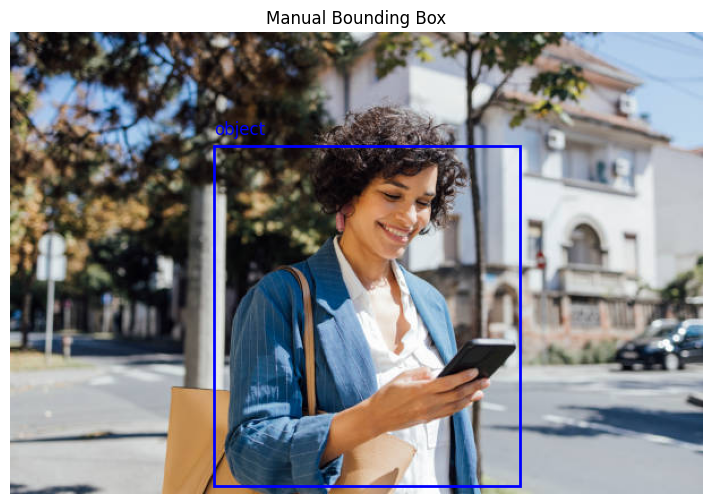

In [5]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Load image
img = cv2.imread("images/person_street.jpg") #create images folder and upload image
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print("Image shape:", img.shape)  # e.g., (408, 612, 3)

# Your desired bounding box
# Define bounding box(es) [((x_min, y_min), (x_max, y_max))]
bbox_coords = [((180, 100), (450, 400))]

#Here's how you can add multiple boxes:
# bbox_coords = [
#     ((50, 150), (250, 300)),       # Box 1
#     ((300, 100), (500, 350)),      # Box 2
#     ((100, 20), (200, 100))        # Box 3
# ]


# Plot it
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(img_rgb)

for top_left, bottom_right in bbox_coords:
    width = bottom_right[0] - top_left[0]
    height = bottom_right[1] - top_left[1]
    rect = patches.Rectangle(top_left, width, height, linewidth=2, edgecolor='blue', facecolor='none')
    ax.add_patch(rect)
    ax.text(top_left[0], top_left[1] - 10, "object", color='blue', fontsize=12)

plt.title("Manual Bounding Box")
plt.axis("off")
plt.show()


# OpenCV Intractive BoundingBox Drawing Code

In [8]:
# OpenCV Interactive Bounding Box Drawing Code

import cv2

# Global variables
drawing = False
start_point = (-1, -1)
bboxes = []

def draw_rectangle(event, x, y, flags, param):
    global drawing, start_point, bboxes, img_copy

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        start_point = (x, y)

    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing:
            img_copy = img.copy()
            cv2.rectangle(img_copy, start_point, (x, y), (255, 0, 0), 2)

    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        end_point = (x, y)
        bboxes.append((start_point, end_point))
        cv2.rectangle(img, start_point, end_point, (255, 0, 0), 2)

# Load image
img = cv2.imread("images/person_street.jpg")
if img is None:
    raise FileNotFoundError("Image not found.")
img_copy = img.copy()

cv2.namedWindow("Draw Bounding Boxes")
cv2.setMouseCallback("Draw Bounding Boxes", draw_rectangle)

print("Instructions: Left click & drag to draw a box. Press 'q' to quit.")

while True:
    cv2.imshow("Draw Bounding Boxes", img_copy)
    key = cv2.waitKey(1) & 0xFF

    if key == ord('q'):  # Press 'q' to exit
        break

cv2.destroyAllWindows()

# Print results
print("Bounding Boxes (top-left and bottom-right coordinates):")
for i, (pt1, pt2) in enumerate(bboxes, 1):
    print(f"{i}. {pt1} → {pt2}")


Instructions: Left click & drag to draw a box. Press 'q' to quit.
Bounding Boxes (top-left and bottom-right coordinates):
1. (123, 161) → (528, 367)
2. (284, 134) → (284, 134)
3. (229, 160) → (422, 56)
4. (96, 65) → (544, 352)


 Export to YOLO Format (Optional)

In [ ]:
# # Each box can be converted to YOLO format like this:

# height, width = img.shape[:2]
# yolo_labels = []

# for (x1, y1), (x2, y2) in bboxes:
#     # Get center, width, height in YOLO format
#     x_center = ((x1 + x2) / 2) / width
#     y_center = ((y1 + y2) / 2) / height
#     box_width = abs(x2 - x1) / width
#     box_height = abs(y2 - y1) / height
#     yolo_labels.append(f"0 {x_center:.6f} {y_center:.6f} {box_width:.6f} {box_height:.6f}")

# # Save to .txt file
# with open("person_street.txt", "w") as f:
#     f.write("\n".join(yolo_labels))


# Generate Pascal VOC XML from Bounding Boxes

In [11]:
import os
import cv2
from lxml import etree, objectify
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def create_voc_xml(image_path, bbox_coords, label="object", output_dir="annotations"):
    os.makedirs(output_dir, exist_ok=True)

    # Load image info
    img = cv2.imread(image_path)
    if img is None:
        print("Failed to read image:", image_path)
        return
    height, width, depth = img.shape
    filename = os.path.basename(image_path)

    # === Create Pascal VOC XML Tree ===
    E = objectify.ElementMaker(annotate=False)
    anno_tree = E.annotation(
        E.folder("images"),
        E.filename(filename),
        E.path(image_path),
        E.source(
            E.database("Unknown")
        ),
        E.size(
            E.width(width),
            E.height(height),
            E.depth(depth)
        ),
        E.segmented(0)
    )

    for bbox in bbox_coords:
        (xmin, ymin), (xmax, ymax) = bbox
        obj = E.object(
            E.name(label),
            E.pose("Unspecified"),
            E.truncated(0),
            E.difficult(0),
            E.bndbox(
                E.xmin(xmin),
                E.ymin(ymin),
                E.xmax(xmax),
                E.ymax(ymax)
            )
        )
        anno_tree.append(obj)

    # === Save XML File ===
    xml_path = os.path.join(output_dir, filename.replace(".jpg", ".xml"))
    etree.ElementTree(anno_tree).write(xml_path, pretty_print=True, xml_declaration=False, encoding="utf-8")
    print(f"Saved VOC XML: {xml_path}")

    # === Visualize Bounding Boxes ===
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.imshow(img_rgb)

    for bbox in bbox_coords:
        (xmin, ymin), (xmax, ymax) = bbox
        width = xmax - xmin
        height = ymax - ymin
        rect = patches.Rectangle((xmin, ymin), width, height, linewidth=2, edgecolor='red', facecolor='none')
        ax.add_patch(rect)
        ax.text(xmin, ymin - 10, label, color='red', fontsize=12, weight='bold')

    plt.title(f"Annotated: {filename}")
    plt.axis("off")
    plt.show()


Saved VOC XML: annotations\person_street.xml


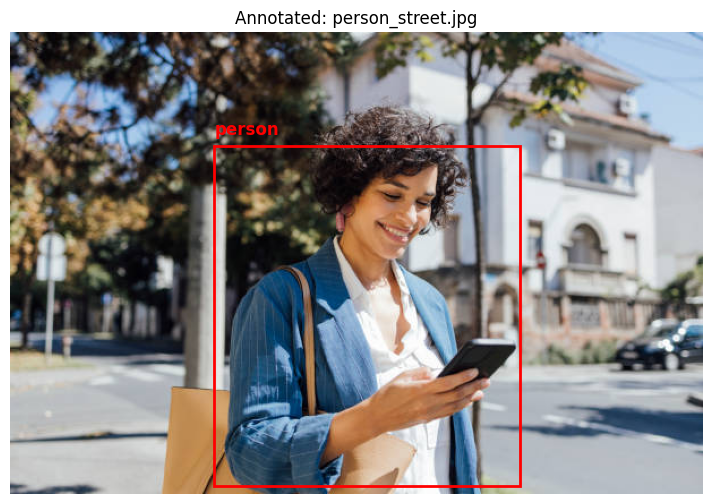

In [12]:
image_path = "images/person_street.jpg"

# Simulated bbox format: [((xmin, ymin), (xmax, ymax))]
bbox_coords = [((180, 100), (450, 400))]

# You can loop through multiple images too
create_voc_xml(image_path, bbox_coords, label="person")

# Polygon Annotation

**Polygon annotation** involves drawing a closed shape (polygon) by connecting multiple points around an object’s **exact contour**, rather than using a simple rectangle.

**Example**:

* Instead of boxing an apple in a square, you trace its **exact edge**.

```text
Polygon points: [(x1, y1), (x2, y2), ..., (xn, yn)]
```

---

## Why Is Polygon Annotation Important?

### 1. **High Precision for Irregular Shapes**

* Many real-world objects aren’t rectangular (e.g., human silhouettes, leaves, animals).
* Bounding boxes **include background** pixels → this adds noise.
* Polygons follow the **true boundary** of objects → more accurate labeling.

| Object              | Bounding Box        | Polygon Annotation        |
| ------------------- | ------------------- | ------------------------- |
| 🍎 Apple            | Includes background | Follows shape tightly     |
| 🐕 Dog (lying down) | Includes floor      | Accurate leg/head outline |

---

### 2. **Used in Instance & Semantic Segmentation**

* **Instance segmentation** = Identify each instance of an object (e.g., 3 people → 3 masks)
* **Semantic segmentation** = Label every pixel with a class (e.g., person, car, road)

Polygon annotation is often **converted to pixel-level masks** for these tasks.

---

### 3. **Critical in Certain Domains**

| Domain                  | Use Case                                      |
| ----------------------- | --------------------------------------------- |
| **Healthcare**          | Annotating tumors, organs in scans            |
| **Agriculture**         | Tracing leaves, pests, fruits in drone images |
| **Autonomous Vehicles** | Labeling lanes, sidewalks, road edges         |
| **Retail**              | Segmenting products on shelves                |

---

## 🔍 Polygon vs. Bounding Box vs. Pixel-based

| Feature              | Bounding Box      | Polygon Annotation | Pixel-based (Mask)    |
| -------------------- | ----------------- | ------------------ | --------------------- |
| Shape flexibility    | ❌ No              | ✅ Yes              | ✅ Yes (exact pixels)  |
| Speed to annotate    | ✅ Fast            | ⚠️ Moderate        | ❌ Slowest             |
| Annotation precision | ❌ Low-Medium      | ✅ High             | ✅ Highest             |
| Best for             | General detection | Irregular shapes   | Semantic segmentation |
| Storage size         | Low               | Medium             | High                  |

---

## Summary of Benefits

✅ Precise object outlines

✅ Better training data for segmentation models

✅ Reduces false background inclusion

✅ Supports complex object boundaries

✅ Enables pixel-level tasks (e.g., smart cropping, AR)

---

## Example: LabelMe Polygon

```json
{
  "label": "dog",
  "points": [[100, 120], [130, 115], [140, 150], [110, 170]]
}
```

This outlines a dog’s head, instead of just putting a box around it.

---

## 🔧 Tools That Support Polygon Annotation

| Tool            | Notes                        |
| --------------- | ---------------------------- |
| **LabelMe**     | Lightweight, polygon-based   |
| **CVAT**        | Web-based, professional tool |
| **VIA**         | Offline, browser-based       |
| **Supervisely** | Cloud-based, AI-assisted     |

---

# Practical exercises using open-source image annotation tools.

In [13]:
# Polygon Annotation using LabelMe

# Run labelme GUI this tool run on desktop (not Colab)

!mkdir -p annotation_output

print("Next Step: Annotate using LabelMe locally and upload JSON file here.")


Next Step: Annotate using LabelMe locally and upload JSON file here.


**Want Interactive Annotation?**

For drawing annotations interactively, use:

LabelImg (for bounding boxes)

LabelMe (for polygon segmentation)

These tools run on desktop (not Colab), and you can upload the .xml or .json back into Colab for further processing.

# LabelMe

**LabelMe** is an open-source graphical image annotation tool developed by the **MIT Computer Science and Artificial Intelligence Laboratory (CSAIL)**. It is widely used for creating **annotations for computer vision datasets**, especially for tasks like **object detection**, **image segmentation**, and **scene understanding**.

---

## What LabelMe Is:

| Feature                               | Description                                                                      |
| ------------------------------------- | -------------------------------------------------------------------------------- |
| 🧰 **Purpose**                        | Annotate objects in images using bounding boxes, polygons, points, lines, etc.   |
| 💻 **Tool Type**                      | Desktop GUI or Web App                                                           |
| 📁 **Output Format**                  | JSON (`.json`) files that store object names, shapes, and coordinates            |
| 📦 **Use Cases**                      | Object detection, instance segmentation, semantic segmentation, dataset creation |
| 🛠️ **Annotation Types**              | Polygons, rectangles, lines, circles, and more                                   |
| 🧑‍🤝‍🧑 **Multiple Objects Support** | You can label multiple classes and instances in a single image                   |

---

## Key Features

* **Polygon Annotation**: Ideal for pixel-accurate segmentation tasks
* **Multi-label Support**: Annotate multiple object types in one image
* **Open Source**: Free to use and extend
* **Offline & Web Support**: Use on your desktop or run a local web server
* **Lightweight Output**: Annotations are saved as human-readable JSON files
* **Export Options**: Convert annotations to COCO, YOLO, Pascal VOC formats using scripts

---

## Example Use Case

You have an image like this:

```plaintext
fruits_table.jpg
```

Using LabelMe, you can manually draw polygons around:

* 🍎 Apple → label: "apple"
* 🍌 Banana → label: "banana"
* 🍊 Orange → label: "orange"

LabelMe will save this as a `.json` file:

```json
{
  "imagePath": "fruits_table.jpg",
  "shapes": [
    {
      "label": "apple",
      "points": [[50,60], [70,80], [90,60]],
      "shape_type": "polygon"
    },
    ...
  ]
}
```

You can then load this `.json` in your ML pipeline or use it for training a segmentation model.

---

## How to Use LabelMe (Desktop)

1. **Install** using pip:

   ```bash
   pip install labelme==5.2.1

   ```

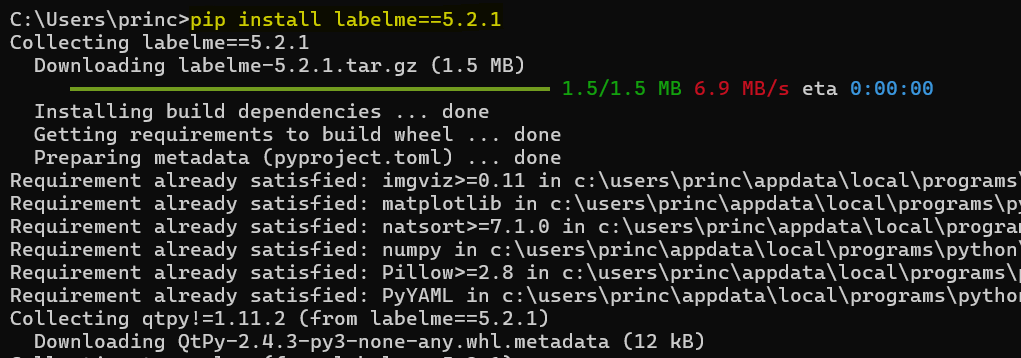

2. **Launch the GUI**:

   ```bash
   labelme
   ```

3. **Load an image**, draw shapes, give labels.

4. **Save**, and it will generate a `.json` file in the same folder.

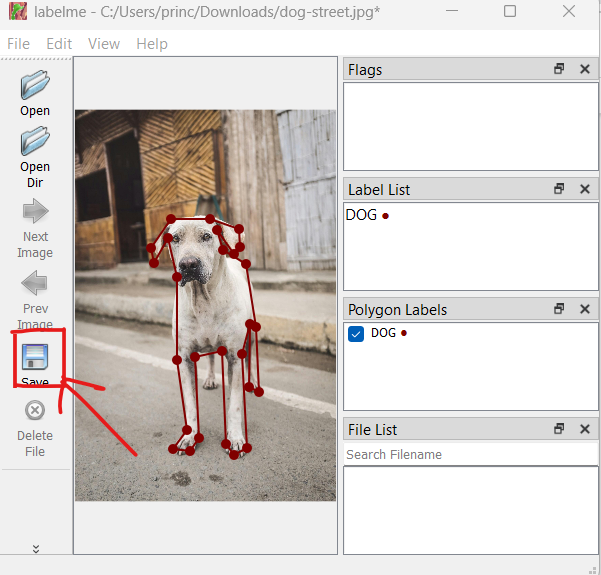

---

## 🌐 GitHub Repo

🔗 [https://github.com/wkentaro/labelme](https://github.com/wkentaro/labelme)

---

Would you like a full step-by-step tutorial (with screenshots) on how students can annotate images using LabelMe and upload JSON to Google Colab?


**🔧 Note:** You should annotate with LabelMe Desktop Tool and upload .json file after local annotation.

# Pixel-Based Annotation

Use thresholding or color masking to understand how pixel-based annotations work before moving on to real tools (like LabelMe, Supervisely, etc.).

# Pixel-Bases Annotation with OpenCV

In [14]:
# 1. Imports and Setup
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Set your images directory
images_dir = "images"

# Load all image paths (jpg/png)
image_paths = [
    os.path.join(images_dir, fname)
    for fname in os.listdir(images_dir)
    if fname.lower().endswith((".jpg", ".jpeg", ".png"))
]

print(f"Found {len(image_paths)} images.")

Found 2 images.


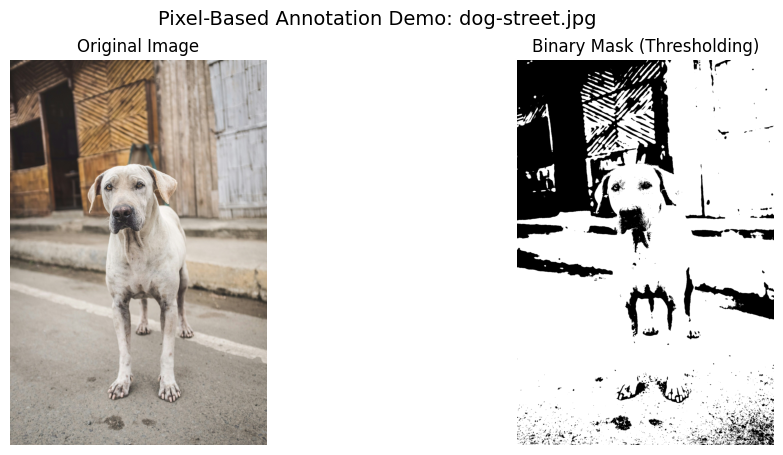

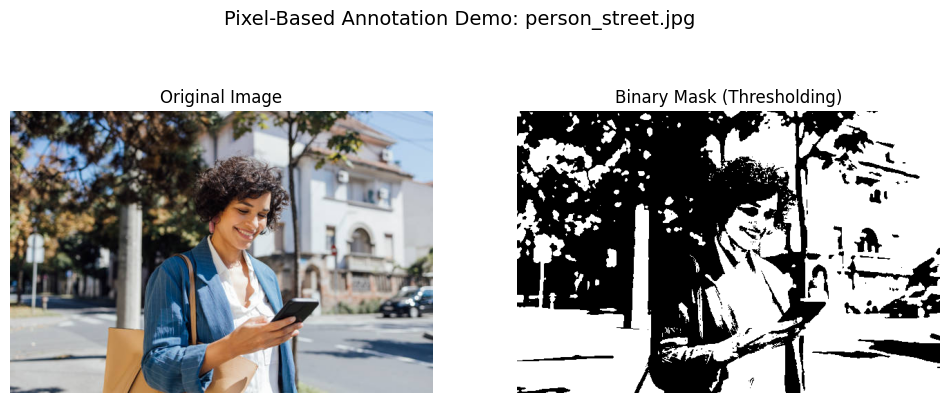

In [15]:
# 2. Pixel-based Annotation using Thresholding (Binary Mask)

def generate_pixel_mask(image_path, threshold=127):
    """Generates a binary mask from grayscale using thresholding."""
    img = cv2.imread(image_path)
    if img is None:
        print(f"Failed to load: {image_path}")
        return None, None

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, mask = cv2.threshold(gray, threshold, 255, cv2.THRESH_BINARY)
    return img, mask

# Visualize
for path in image_paths:
    img, mask = generate_pixel_mask(path)
    if img is None:
        continue

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(mask, cmap="gray")
    plt.title("Binary Mask (Thresholding)")
    plt.axis("off")

    plt.suptitle(f"Pixel-Based Annotation Demo: {os.path.basename(path)}", fontsize=14)
    plt.show()


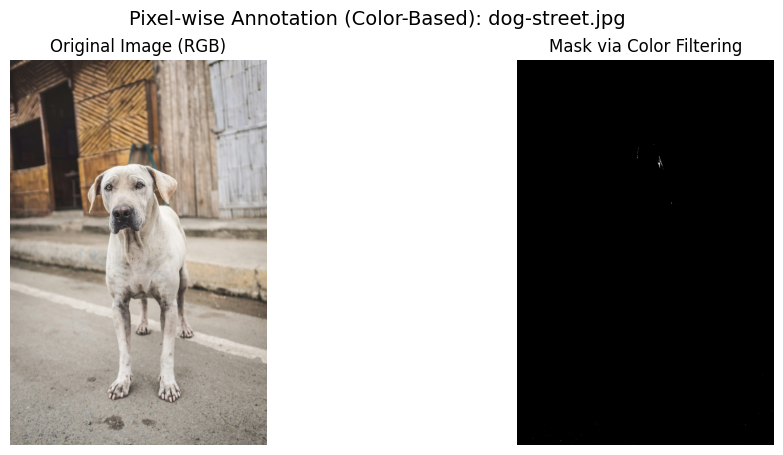

In [16]:
# 3. Advanced: Pixel Mask with Color Filtering

def color_filter_mask(image_path, lower_rgb=(0, 100, 0), upper_rgb=(100, 255, 100)):
    """Creates mask by filtering color ranges in RGB."""
    img = cv2.imread(image_path)
    if img is None:
        print(f"Could not load: {image_path}")
        return None, None

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    lower = np.array(lower_rgb)
    upper = np.array(upper_rgb)
    mask = cv2.inRange(img_rgb, lower, upper)
    return img_rgb, mask

# Try on first image
if image_paths:
    demo_img_path = image_paths[0]
    rgb_img, color_mask = color_filter_mask(demo_img_path)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(rgb_img)
    plt.title("Original Image (RGB)")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(color_mask, cmap="gray")
    plt.title("Mask via Color Filtering")
    plt.axis("off")

    plt.suptitle(f"Pixel-wise Annotation (Color-Based): {os.path.basename(demo_img_path)}", fontsize=14)
    plt.show()


In [17]:
# 4. Optional: Save generated masks

os.makedirs("masks", exist_ok=True)

for path in image_paths:
    _, mask = generate_pixel_mask(path)
    if mask is not None:
        mask_name = os.path.splitext(os.path.basename(path))[0] + "_mask.png"
        cv2.imwrite(os.path.join("masks", mask_name), mask)

print("Saved all binary masks to 'masks/' folder.")

Saved all binary masks to 'masks/' folder.


# Understanding how to use precise pixel-based polygon annotation Using LabelMe.

***Use LabelMe JSON to visualize actual polygon masks***

In [19]:
import os
import cv2
import json
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Create necessary directories
os.makedirs("images", exist_ok=True)
os.makedirs("output_images", exist_ok=True)  # Uncomment to save annotated images
os.makedirs("yolo_labels", exist_ok=True)    # Uncomment to export YOLO labels

# Upload JSON annotation files
print("Upload one or more LabelMe .json annotation files...")
uploaded = files.upload()

# COCO-style annotation container
coco_annotations = {
    "images": [],
    "annotations": [],
    "categories": []
}
annotation_id = 1
category_set = {}

# Process each uploaded JSON
for json_file in uploaded:
    if not json_file.endswith(".json"):
        print(f"Skipping non-JSON file: {json_file}")
        continue

    print(f"Processing: {json_file}")

    with open(json_file, "r") as f:
        data = json.load(f)

    img_filename = data["imagePath"]
    img_path = os.path.join("images", img_filename)

    # Load image
    img = cv2.imread(img_path)
    if img is None:
        print(f"Could not find or load image: {img_path}")
        continue

    height, width = img.shape[:2]

    # Optional: Add image entry for COCO
    # coco_annotations["images"].append({
    #     "id": len(coco_annotations["images"]) + 1,
    #     "file_name": img_filename,
    #     "width": width,
    #     "height": height
    # })

    for shape in data['shapes']:
        points = np.array(shape['points'], dtype=np.int32)
        label = shape['label']

        # Draw polygon on image
        cv2.polylines(img, [points], isClosed=True, color=(0, 255, 0), thickness=2)

        # Draw label with better visibility
        text_size, _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.7, 2)
        text_w, text_h = text_size
        x, y = points[0]
        y = max(y, text_h + 10)

        # Background rectangle for label
        cv2.rectangle(img, (x, y - text_h - 8), (x + text_w + 4, y), (0, 255, 0), -1)

        # Draw label text
        cv2.putText(img, label, (x + 2, y - 4), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 0), 2)

        # YOLO Export (optional)
        # bbox = cv2.boundingRect(points)
        # x_center = (bbox[0] + bbox[2] / 2) / width
        # y_center = (bbox[1] + bbox[3] / 2) / height
        # w_norm = bbox[2] / width
        # h_norm = bbox[3] / height
        #
        # class_id = category_set.setdefault(label, len(category_set))
        # yolo_txt_path = os.path.join("yolo_labels", img_filename.rsplit('.', 1)[0] + ".txt")
        # with open(yolo_txt_path, "a") as yolo_file:
        #     yolo_file.write(f"{class_id} {x_center:.6f} {y_center:.6f} {w_norm:.6f} {h_norm:.6f}\n")

        # COCO Export (optional)
        # if label not in category_set:
        #     category_id = len(category_set) + 1
        #     category_set[label] = category_id
        #     coco_annotations["categories"].append({
        #         "id": category_id,
        #         "name": label
        #     })
        #
        x, y, w, h = cv2.boundingRect(points)
        coco_annotations["annotations"].append({
            "id": annotation_id,
            "image_id": len(coco_annotations["images"]),
            "category_id": category_set[label],
            "bbox": [x, y, w, h],
            "area": w * h,
            "iscrowd": 0,
            "segmentation": [points.flatten().tolist()]
        })
        annotation_id += 1

    # Display the annotated image
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 6))
    plt.imshow(img_rgb)
    plt.title(f"Polygon Annotation: {img_filename}")
    plt.axis('off')
    plt.show()

    # Save annotated image (optional)
    # save_path = os.path.join("output_images", img_filename)
    # cv2.imwrite(save_path, img)
    # print(f"Saved: {save_path}")

# Save COCO JSON file (optional)
# with open("coco_annotations.json", "w") as out_file:
#     json.dump(coco_annotations, out_file, indent=4)
# print("COCO annotations saved to coco_annotations.json")

# Save YOLO class mapping (optional)
# with open("yolo_labels/classes.txt", "w") as f:
#     for label, idx in sorted(category_set.items(), key=lambda x: x[1]):
#         f.write(f"{label}\n")


ModuleNotFoundError: No module named 'google.colab'